In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
filepath="titanic/train.xls"
filepath1="titanic/test.xls"
train_df = pd.read_excel(filepath)
test_df = pd.read_excel(filepath1)

In [3]:
col=['Survived','PassengerId','Name','Pclass' ,'Sex', 'Age', 'SibSp',
      'Parch', 'Fare', 'Embarked']
col_1=['PassengerId','Name','Pclass' ,'Sex', 'Age', 'SibSp',
      'Parch', 'Fare', 'Embarked']
train_df=train_df[col]
test_df=test_df[col_1]

In [4]:
def PreprocessData(raw_df):
    df=raw_df.drop(['PassengerId'], axis=1)
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [5]:
def PreprocessData1(raw_df):
    df=raw_df.drop(['PassengerId'], axis=1)
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures

In [6]:
train_Features,train_Label=PreprocessData(train_df)
test_Features=PreprocessData1(test_df)

In [7]:
train_Features[:5]

array([[0.        , 1.        , 1.        , 0.27117366, 0.125     ,
        0.        , 0.01415106, 0.        , 0.        , 1.        ],
       [0.0011236 , 0.        , 0.        , 0.4722292 , 0.125     ,
        0.        , 0.13913574, 1.        , 0.        , 0.        ],
       [0.00224719, 1.        , 0.        , 0.32143755, 0.        ,
        0.        , 0.01546857, 0.        , 0.        , 1.        ],
       [0.00337079, 0.        , 0.        , 0.43453129, 0.125     ,
        0.        , 0.1036443 , 0.        , 0.        , 1.        ],
       [0.00449438, 1.        , 1.        , 0.43453129, 0.        ,
        0.        , 0.01571255, 0.        , 0.        , 1.        ]])

In [8]:
train_Features.shape

(891, 10)

In [9]:
train_Label[:5]

array([0., 1., 1., 1., 0.])

In [10]:
test_Features[:5]

array([[0.        , 1.        , 1.        , 0.4527232 , 0.        ,
        0.        , 0.01528158, 0.        , 1.        , 0.        ],
       [0.00239808, 1.        , 0.        , 0.61756561, 0.125     ,
        0.        , 0.01366309, 0.        , 0.        , 1.        ],
       [0.00479616, 0.5       , 1.        , 0.8153765 , 0.        ,
        0.        , 0.01890874, 0.        , 1.        , 0.        ],
       [0.00719424, 1.        , 1.        , 0.35381775, 0.        ,
        0.        , 0.01690807, 0.        , 0.        , 1.        ],
       [0.00959233, 1.        , 0.        , 0.28788079, 0.125     ,
        0.11111111, 0.0239836 , 0.        , 0.        , 1.        ]])

# 3. Create Model 

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [12]:
model = Sequential()

In [13]:
model.add(Dense(units=100, input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=90, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=50, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=90, 
                         batch_size=10,verbose=2)

Train on 801 samples, validate on 90 samples
Epoch 1/90
 - 0s - loss: 0.6418 - accuracy: 0.6317 - val_loss: 0.5390 - val_accuracy: 0.8111
Epoch 2/90
 - 0s - loss: 0.4990 - accuracy: 0.7840 - val_loss: 0.5016 - val_accuracy: 0.8000
Epoch 3/90
 - 0s - loss: 0.4757 - accuracy: 0.7890 - val_loss: 0.4424 - val_accuracy: 0.8111
Epoch 4/90
 - 0s - loss: 0.4506 - accuracy: 0.7978 - val_loss: 0.4392 - val_accuracy: 0.8000
Epoch 5/90
 - 0s - loss: 0.4514 - accuracy: 0.8052 - val_loss: 0.4273 - val_accuracy: 0.8111
Epoch 6/90
 - 0s - loss: 0.4491 - accuracy: 0.7978 - val_loss: 0.4216 - val_accuracy: 0.8111
Epoch 7/90
 - 0s - loss: 0.4406 - accuracy: 0.8140 - val_loss: 0.4249 - val_accuracy: 0.8222
Epoch 8/90
 - 0s - loss: 0.4402 - accuracy: 0.8015 - val_loss: 0.4153 - val_accuracy: 0.8444
Epoch 9/90
 - 0s - loss: 0.4357 - accuracy: 0.8052 - val_loss: 0.4264 - val_accuracy: 0.8111
Epoch 10/90
 - 0s - loss: 0.4321 - accuracy: 0.8140 - val_loss: 0.4424 - val_accuracy: 0.7889
Epoch 11/90
 - 0s - loss

Epoch 88/90
 - 0s - loss: 0.3553 - accuracy: 0.8439 - val_loss: 0.5142 - val_accuracy: 0.8333
Epoch 89/90
 - 0s - loss: 0.3664 - accuracy: 0.8302 - val_loss: 0.4135 - val_accuracy: 0.8333
Epoch 90/90
 - 0s - loss: 0.3548 - accuracy: 0.8439 - val_loss: 0.4141 - val_accuracy: 0.8111


# 6. Print History

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

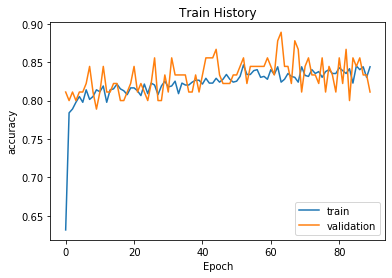

In [20]:
show_train_history(train_history,'accuracy','val_accuracy')

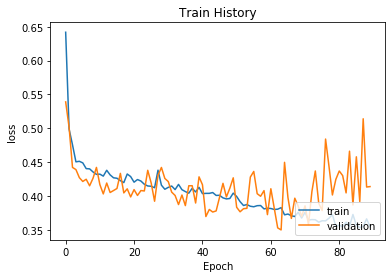

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
all_probability=model.predict(test_Features)

In [23]:
all_probability[:10]

array([[0.08617401],
       [0.5218801 ],
       [0.04673225],
       [0.14868599],
       [0.49997   ],
       [0.19268283],
       [0.98350996],
       [0.14586532],
       [0.3728999 ],
       [0.12697878]], dtype=float32)

In [24]:
pd=test_df
pd.insert(len(test_df.columns),
          'probability',all_probability)

In [25]:
pd[2:]

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,probability
2,894,"Myles, Mr. Thomas Francis",2,male,62.0,0,0,9.6875,Q,0.046732
3,895,"Wirz, Mr. Albert",3,male,27.0,0,0,8.6625,S,0.148686
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.0,1,1,12.2875,S,0.499970
5,897,"Svensson, Mr. Johan Cervin",3,male,14.0,0,0,9.2250,S,0.192683
6,898,"Connolly, Miss. Kate",3,female,30.0,0,0,7.6292,Q,0.983510
...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",3,male,NaN,0,0,8.0500,S,0.067124
414,1306,"Oliva y Ocana, Dona. Fermina",1,female,39.0,0,0,108.9000,C,0.999974
415,1307,"Saether, Mr. Simon Sivertsen",3,male,38.5,0,0,7.2500,S,0.068551
416,1308,"Ware, Mr. Frederick",3,male,NaN,0,0,8.0500,S,0.066338


In [33]:
test_result=pd.drop(['Name','Pclass','Age','Sex','SibSp','Parch','Embarked','probability','Fare'], axis=1)

In [34]:
test_probability=model.predict(test_Features)

In [35]:
test_probability[:2]

array([[0.08617401],
       [0.5218801 ]], dtype=float32)

In [36]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_probability)
test_predict_result=test_predict_result.astype(numpy.int32)
test_predict_result[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [37]:
test_result.insert(len(test_result.columns),
          'Survived',test_predict_result)

In [38]:
test_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
test_result.to_csv("result.csv",index=False)